## Blue Owl Data Science Challenge

### Importing data 

In [10]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df_train = pd.read_csv("C:/Users/archd/Downloads/data/train.csv")
df_test = pd.read_csv("C:/Users/archd/Downloads/data/test.csv")

In [3]:
df_train.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,iPhone,M,0,62717,2,1,4,0
1,50,0.004733,desktop,F,0,64328,2,3,2,0
2,54,0.004129,laptop,M,0,83439,1,3,7,0
3,16,0.005117,Android,F,0,30110,2,3,0,0
4,37,0.003635,desktop,M,0,76565,2,1,5,0


In [4]:
df_train.shape

(10000, 10)

In [5]:
df_test.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
0,34,0.005134,Android,F,1,40376,1,3,7
1,53,0.005223,desktop,F,1,84511,1,1,11
2,46,0.004939,laptop,F,0,79322,1,1,4
3,36,0.004924,Android,F,0,63295,1,2,0
4,28,0.005146,other,F,1,36170,1,3,3


In [6]:
df_test.shape

(10000, 9)

### Analysis

In [18]:
df_test.isnull().any().any()

True

In [19]:
df_test.isnull().sum()

age                             0
cost_of_ad                      0
device_type                     0
gender                        249
in_initial_launch_location      0
income                          0
n_drivers                       0
n_vehicles                      0
prior_ins_tenure                0
dtype: int64

In [7]:
df_train.isnull().any().any()

True

In [8]:
df_train.isnull().sum()

age                             0
cost_of_ad                      0
device_type                     0
gender                        269
in_initial_launch_location      0
income                          0
n_drivers                       0
n_vehicles                      0
prior_ins_tenure                0
outcome                         0
dtype: int64

In [9]:
df_train.outcome.value_counts()

0    9018
1     982
Name: outcome, dtype: int64

In [16]:
df_train.gender.value_counts()

F    4970
M    4761
Name: gender, dtype: int64

In [17]:
df_test.gender.value_counts()

F    4906
M    4845
Name: gender, dtype: int64

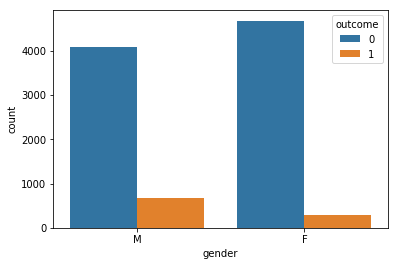

In [13]:
sns.countplot(x = df_train.gender, hue = df_train.outcome)

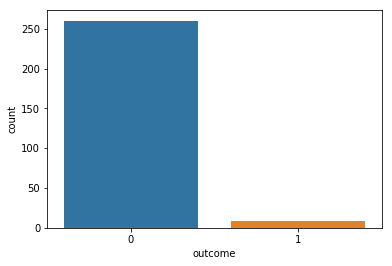

In [15]:
sns.countplot(x = df_train.outcome[df_train.gender.isnull()])

In [24]:
df_train.gender.fillna('U', inplace = True)
df_test.gender.fillna('U', inplace = True)

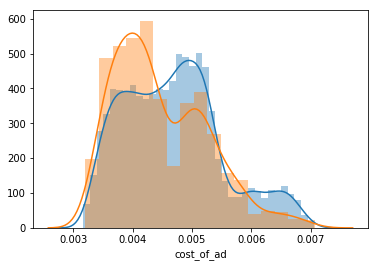

In [28]:
sns.distplot(df_train[df_train.outcome == 0].cost_of_ad, label = "Outcome 0")
sns.distplot(df_train[df_train.outcome == 1].cost_of_ad, label = "Outcome 1")

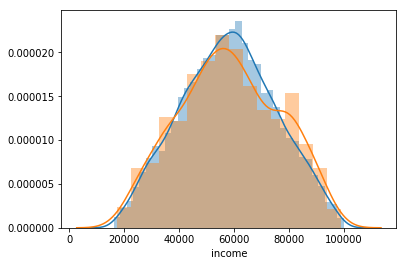

In [31]:
sns.distplot(df_train[df_train.outcome == 0].income, label = "Outcome 0")
sns.distplot(df_train[df_train.outcome == 1].income, label = "Outcome 1")

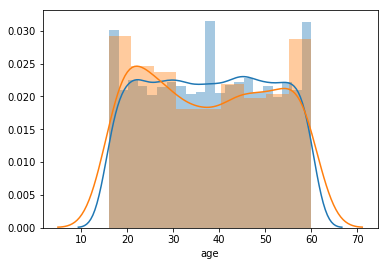

In [33]:
sns.distplot(df_train[df_train.outcome == 0].age, label = "Outcome 0")
sns.distplot(df_train[df_train.outcome == 1].age, label = "Outcome 1")

In [32]:
df_train.columns

Index(['age', 'cost_of_ad', 'device_type', 'gender',
       'in_initial_launch_location', 'income', 'n_drivers', 'n_vehicles',
       'prior_ins_tenure', 'outcome'],
      dtype='object')

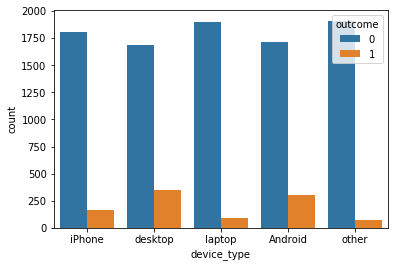

In [34]:
sns.countplot(x = df_train.device_type, hue = df_train.outcome)

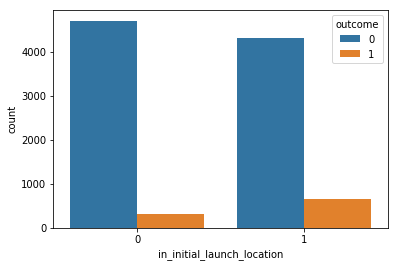

In [35]:
sns.countplot(x = df_train.in_initial_launch_location, hue = df_train.outcome)

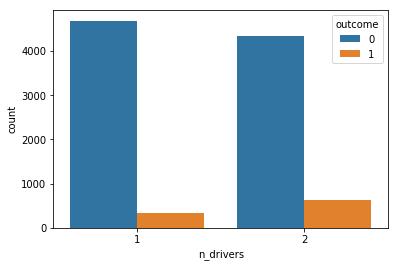

In [36]:
sns.countplot(x = df_train.n_drivers, hue = df_train.outcome)

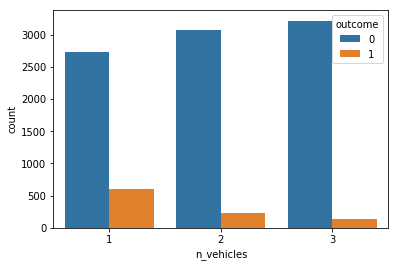

In [37]:
sns.countplot(x = df_train.n_vehicles, hue = df_train.outcome)

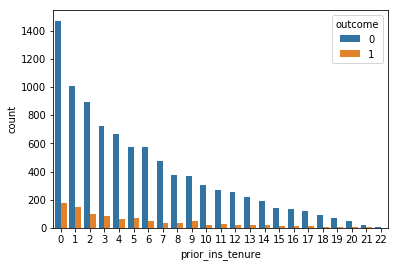

In [38]:
sns.countplot(x = df_train.prior_ins_tenure, hue = df_train.outcome)

## Modelling

In [39]:
df_t = pd.get_dummies(df_train, columns=['device_type', 'gender'], drop_first=True)
df_t.head()

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_M,gender_U
0,56,0.005737,0,62717,2,1,4,0,0,1,0,0,1,0
1,50,0.004733,0,64328,2,3,2,0,1,0,0,0,0,0
2,54,0.004129,0,83439,1,3,7,0,0,0,1,0,1,0
3,16,0.005117,0,30110,2,3,0,0,0,0,0,0,0,0
4,37,0.003635,0,76565,2,1,5,0,1,0,0,0,1,0


In [40]:
X = df_t.drop('outcome', axis = 1)
y = df_t.outcome

In [41]:
y.value_counts()

0    9018
1     982
Name: outcome, dtype: int64

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, accuracy_score
from sklearn.svm import SVC
import scikitplot as skplt

In [48]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, random_state = 0, test_size = 0.2)

In [63]:
logistic = LogisticRegression(class_weight="balanced")
tree = DecisionTreeClassifier(class_weight="balanced")
xgb_model = xgb.XGBClassifier(scale_pos_weight= 10)
svm = SVC(class_weight="balanced")
rf = RandomForestClassifier(class_weight = "balanced")

In [54]:
logistic.fit(X_train, y_train)

print(confusion_matrix(y_val, logistic.predict(X_val)))
print(roc_auc_score(y_val, logistic.predict(X_val)))

[[   0 1804]
 [   0  196]]
0.5


In [59]:
tree.fit(X_train, y_train)

print(confusion_matrix(y_val, tree.predict(X_val)))
print(roc_auc_score(y_val, tree.predict(X_val)))

[[1677  127]
 [ 129   67]]
0.6357188108059189


In [60]:
xgb_model.fit(X_train, y_train)

print(confusion_matrix(y_val, xgb_model.predict(X_val)))
print(roc_auc_score(y_val, xgb_model.predict(X_val)))

[[1346  458]
 [  46  150]]
0.7557129281867958


In [61]:
svm.fit(X_train, y_train)

print(confusion_matrix(y_val, svm.predict(X_val)))
print(roc_auc_score(y_val, svm.predict(X_val)))

[[1419  385]
 [ 140   56]]
0.5361498257839721


In [64]:
rf.fit(X_train, y_train)

print(confusion_matrix(y_val, rf.predict(X_val)))
print(roc_auc_score(y_val, rf.predict(X_val)))

[[1784   20]
 [ 152   44]]
0.6067016607086293


### Tuning XGBoost

#### Model 1

In [90]:
params = {
    'scale_pos_weight':[6, 8, 10, 12, 14]
}

g = GridSearchCV(estimator = xgb.XGBClassifier(objective= 'binary:logistic'), param_grid = params, scoring='roc_auc', cv=5)

g.fit(X,y)
g.best_params_, g.best_score_

({'scale_pos_weight': 6}, 0.8480237565916358)

In [91]:
g.cv_results_['params'], g.cv_results_['mean_test_score'], g.cv_results_['rank_test_score']

([{'scale_pos_weight': 6},
  {'scale_pos_weight': 8},
  {'scale_pos_weight': 10},
  {'scale_pos_weight': 12},
  {'scale_pos_weight': 14}],
 array([0.84802376, 0.84689807, 0.84676047, 0.84621237, 0.84567586]),
 array([1, 2, 3, 4, 5]))

In [92]:
g.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, seed=None,
              silent=None, subsample=1, verbosity=1)

#### Model 2

In [88]:
params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

g = GridSearchCV(estimator = xgb.XGBClassifier(objective= 'binary:logistic'), param_grid = params, scoring='roc_auc', cv=5)

g.fit(X,y)
g.best_params_, g.best_score_

({'max_depth': 3, 'min_child_weight': 5}, 0.8498649843177098)

In [87]:
g.cv_results_['params'], g.cv_results_['mean_test_score'], g.cv_results_['rank_test_score']

([{'max_depth': 3, 'min_child_weight': 1},
  {'max_depth': 3, 'min_child_weight': 3},
  {'max_depth': 3, 'min_child_weight': 5},
  {'max_depth': 5, 'min_child_weight': 1},
  {'max_depth': 5, 'min_child_weight': 3},
  {'max_depth': 5, 'min_child_weight': 5},
  {'max_depth': 7, 'min_child_weight': 1},
  {'max_depth': 7, 'min_child_weight': 3},
  {'max_depth': 7, 'min_child_weight': 5},
  {'max_depth': 9, 'min_child_weight': 1},
  {'max_depth': 9, 'min_child_weight': 3},
  {'max_depth': 9, 'min_child_weight': 5}],
 array([0.84877776, 0.84978011, 0.84986498, 0.84449534, 0.84467291,
        0.8447001 , 0.83441795, 0.83597516, 0.84028005, 0.82741615,
        0.83377129, 0.83552059]),
 array([ 3,  2,  1,  6,  5,  4, 10,  8,  7, 12, 11,  9]))

In [93]:
params = {
    'max_depth':[3,4],
    'min_child_weight':[2,3,4,5,6]
}

g = GridSearchCV(estimator = xgb.XGBClassifier(objective= 'binary:logistic'), param_grid = params, scoring='roc_auc', cv=5)

g.fit(X,y)
g.best_params_, g.best_score_

({'max_depth': 3, 'min_child_weight': 5}, 0.8498649843177098)

In [95]:
params = {
    'scale_pos_weight':[4, 6, 8, 10, 12, 14]
}

g = GridSearchCV(estimator = xgb.XGBClassifier(objective= 'binary:logistic', max_depth= 3, min_child_weight= 5), param_grid = params, scoring='roc_auc', cv=5)

g.fit(X,y)
g.best_params_, g.best_score_

({'scale_pos_weight': 4}, 0.8485617203295931)

In [96]:
model = g.best_estimator_

model.fit(X_train, y_train)

confusion_matrix(y_val, model.predict(X_val))

array([[1635,  169],
       [  78,  118]], dtype=int64)

In [97]:
roc_auc_score(y_val, model.predict(X_val))

0.7541800533960813

In [98]:
roc_auc_score(y_train, model.predict(X_train))

0.7609160093710915

#### Model 3

In [101]:
params = {
    'n_estimators':[100, 200, 300, 400, 500],
    'scale_pos_weight':[4, 6, 8, 10]
}

g = GridSearchCV(estimator = xgb.XGBClassifier(objective= 'binary:logistic', max_depth = 3, min_child_weight = 5)
                 , param_grid = params, scoring='roc_auc', cv=5)

g.fit(X,y)
g.best_params_, g.best_score_

({'n_estimators': 100, 'scale_pos_weight': 4}, 0.8485617203295931)

In [102]:
g.cv_results_['params'], g.cv_results_['mean_test_score'], g.cv_results_['rank_test_score']

([{'n_estimators': 100, 'scale_pos_weight': 4},
  {'n_estimators': 100, 'scale_pos_weight': 6},
  {'n_estimators': 100, 'scale_pos_weight': 8},
  {'n_estimators': 100, 'scale_pos_weight': 10},
  {'n_estimators': 200, 'scale_pos_weight': 4},
  {'n_estimators': 200, 'scale_pos_weight': 6},
  {'n_estimators': 200, 'scale_pos_weight': 8},
  {'n_estimators': 200, 'scale_pos_weight': 10},
  {'n_estimators': 300, 'scale_pos_weight': 4},
  {'n_estimators': 300, 'scale_pos_weight': 6},
  {'n_estimators': 300, 'scale_pos_weight': 8},
  {'n_estimators': 300, 'scale_pos_weight': 10},
  {'n_estimators': 400, 'scale_pos_weight': 4},
  {'n_estimators': 400, 'scale_pos_weight': 6},
  {'n_estimators': 400, 'scale_pos_weight': 8},
  {'n_estimators': 400, 'scale_pos_weight': 10},
  {'n_estimators': 500, 'scale_pos_weight': 4},
  {'n_estimators': 500, 'scale_pos_weight': 6},
  {'n_estimators': 500, 'scale_pos_weight': 8},
  {'n_estimators': 500, 'scale_pos_weight': 10}],
 array([0.84856172, 0.84824594, 0.

### Model 4

In [105]:
params = {
 'max_depth':[3],
 'min_child_weight':[5],
 'learning_rate':[0.1, 0.5, 1],
 'subsample':[0.7, 0.8, 0.9],
 'scale_pos_weight': [4, 5, 6],
 'colsample_bytree':[0.7, 0.8, 0.9],
 'n_estimators': [100, 150, 200]   
}

g = GridSearchCV(estimator = xgb.XGBClassifier(objective= 'binary:logistic'), param_grid = params, scoring='roc_auc', cv=5)

g.fit(X,y)

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [106]:
g.best_params_, g.best_score_

({'colsample_bytree': 0.7,
  'learning_rate': 0.1,
  'max_depth': 3,
  'min_child_weight': 5,
  'n_estimators': 100,
  'scale_pos_weight': 5,
  'subsample': 0.9},
 0.8507907060602988)

In [120]:
g.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [108]:
model = g.best_estimator_

model.fit(X_train, y_train)

confusion_matrix(y_val, model.predict(X_val))

array([[1584,  220],
       [  67,  129]], dtype=int64)

In [109]:
roc_auc_score(y_val, model.predict(X_val))

0.7681060228969636

In [111]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)
skf

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [122]:
roc = []
acc = []
f1 = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index,], X.iloc[test_index,]
    y_train, y_test = y[train_index], y[test_index]
    
    model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, seed=None,
              silent=None, subsample=0.9, verbosity=1)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    roc.append(roc_auc_score(y_test, y_pred))
    acc.append(accuracy_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred, average = "macro"))

In [124]:
np.mean(roc), np.std(roc)

(0.7489450706442473, 0.019363772610062325)

In [125]:
np.mean(acc), np.std(acc)

(0.8516999999999999, 0.00741687265631547)

In [126]:
np.mean(f1), np.std(f1)

(0.6827895060850308, 0.014677903094621175)

## Neural Network 

In [306]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.callbacks import History
from keras import backend as K
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [275]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, random_state = 0, test_size = 0.1)

In [276]:
X_train.shape

(9000, 13)

In [277]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_val_std = sc.transform(X_val)

In [278]:
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [327]:
history = History()

classifier = Sequential()

classifier.add(Dense(units = 16, activation = 'relu', input_dim = 13))
classifier.add(Dense(units = 8, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'relu'))
classifier.add(Dense(units = 1, activation ='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = [auc])

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_160 (Dense)            (None, 16)                224       
_________________________________________________________________
dense_161 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_162 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_163 (Dense)            (None, 1)                 5         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [328]:
%%time
# fit the model
classifier.fit(X_train_std, y_train, epochs=100, batch_size=50, validation_split=0.1, verbose=1, class_weight = {0:1, 1:9},
          callbacks = [history, keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=0, mode='auto')])

Train on 8100 samples, validate on 900 samples
Epoch 1/100
8100/8100 [==============================] - 8s 1ms/step - loss: 1.2446 - auc: 0.5445 - val_loss: 1.0320 - val_auc: 0.5906
Epoch 2/100
8100/8100 [==============================] - 1s 112us/step - loss: 1.2031 - auc: 0.6183 - val_loss: 1.0035 - val_auc: 0.6440
Epoch 3/100
8100/8100 [==============================] - 1s 119us/step - loss: 1.1619 - auc: 0.6614 - val_loss: 0.9635 - val_auc: 0.6820
Epoch 4/100
8100/8100 [==============================] - 1s 115us/step - loss: 1.1097 - auc: 0.6977 - val_loss: 0.9100 - val_auc: 0.7138
Epoch 5/100
8100/8100 [==============================] - 1s 117us/step - loss: 1.0549 - auc: 0.7273 - val_loss: 0.8627 - val_auc: 0.7381
Epoch 6/100
8100/8100 [==============================] - 1s 123us/step - loss: 1.0119 - auc: 0.7471 - val_loss: 0.8371 - val_auc: 0.7553
Epoch 7/100
8100/8100 [==============================] - 1s 154us/step - loss: 0.9805 - auc: 0.7614 - val_loss: 0.8243 - val_auc: 0.7

In [329]:
y_preds = classifier.predict_classes(X_train_std)

confusion_matrix(y_train, y_preds)

array([[6348, 1768],
       [ 157,  727]], dtype=int64)

In [330]:
roc_auc_score(y_train, y_preds)

0.8022784444558427

In [331]:
y_preds = classifier.predict_classes(X_val_std)

confusion_matrix(y_val, y_preds)

array([[686, 216],
       [ 21,  77]], dtype=int64)

In [332]:
roc_auc_score(y_val, y_preds)

0.7731232182451694